Importing packages 

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# scaler 
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler,QuantileTransformer, RobustScaler
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras import Sequential
from keras.layers import Dense 


Importing dataset

In [58]:
df = pd.read_csv("BankRecords.csv")

### EDA

In [59]:
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [60]:
df.describe()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [62]:
df.isna().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

Unique values in Education column

In [63]:
df["Education"].unique()

array(['Diploma', 'Degree', 'Masters'], dtype=object)

Distribution of each column 

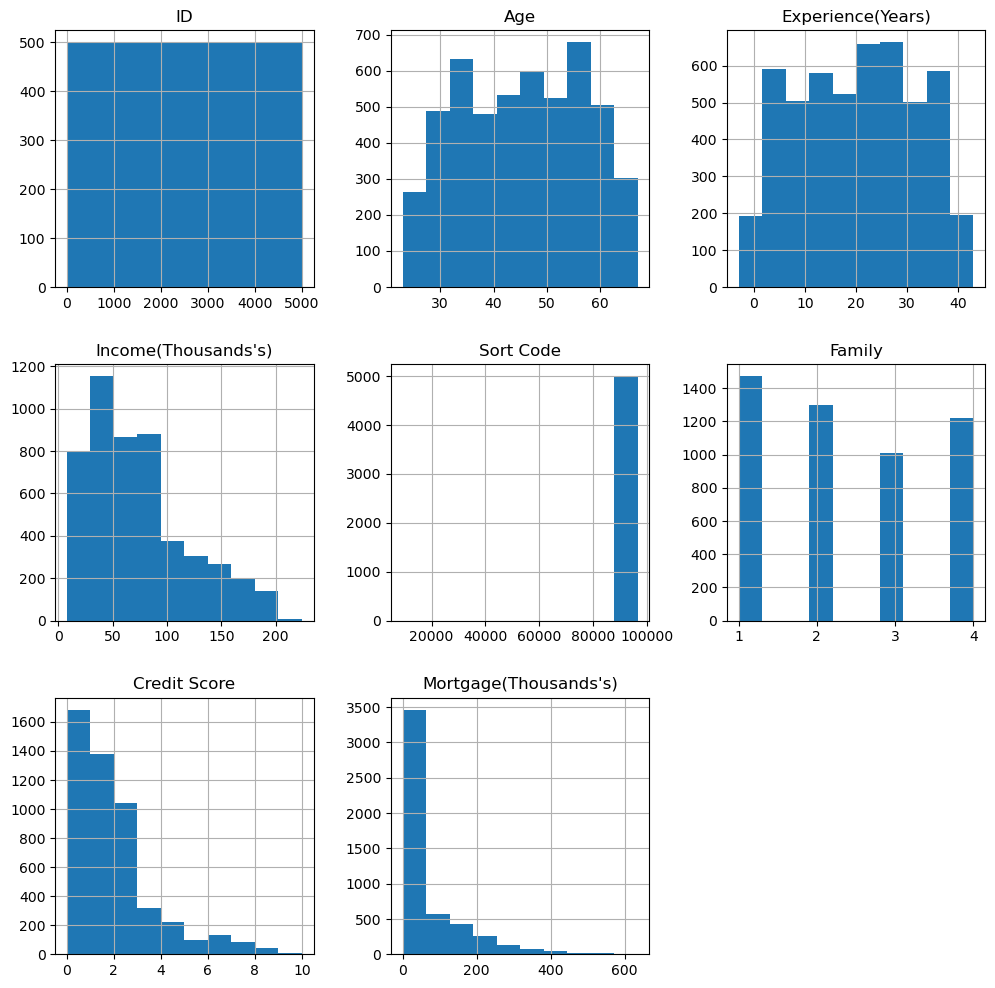

In [64]:
df.hist(figsize=(12,12))
plt.show()

From the graph above, we can determine that Credit Score, Sort Code, Mortgage and Income columns are left-skewed, the rest of the columns, except of ID, follow more Gaussian distribution. 

The following graph shows distribution of Education column across the dataset. We can observe that Diploma column contain close to 600 more records that the other two. 

<Axes: xlabel='Education', ylabel='count'>

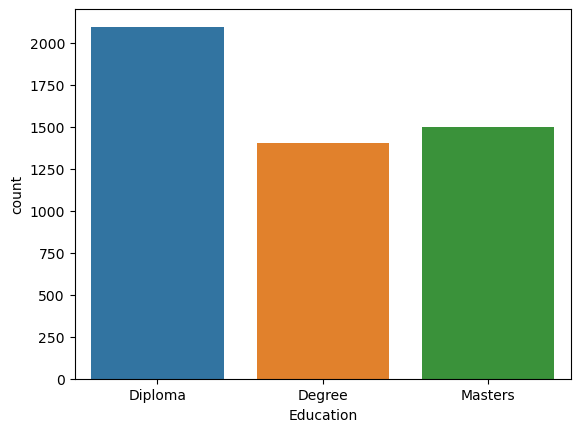

In [65]:
sns.countplot(data=df, x='Education')


Following graph, box plot of Experience, shows us minimum and maximum values in this columns, as well as that distribution between 25 th and 75th percentile ips concluded between 10 and 30 years of experience. With mean of this column falling at 20 years.

<Axes: ylabel='Experience(Years)'>

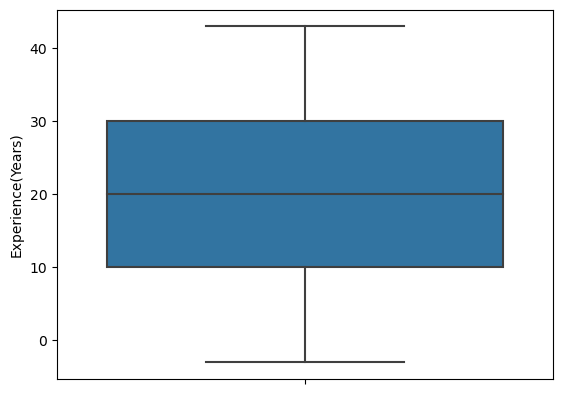

In [66]:
sns.boxplot(data=df, y='Experience(Years)')

The next graph shows the distribution of Income in respect to Education. We can see that Degree and Masters columns contain outliers in significant numbers, therefore, I would advocate for not removing them, since they might hold a pattern.  

<Axes: xlabel='Education', ylabel="Income(Thousands's)">

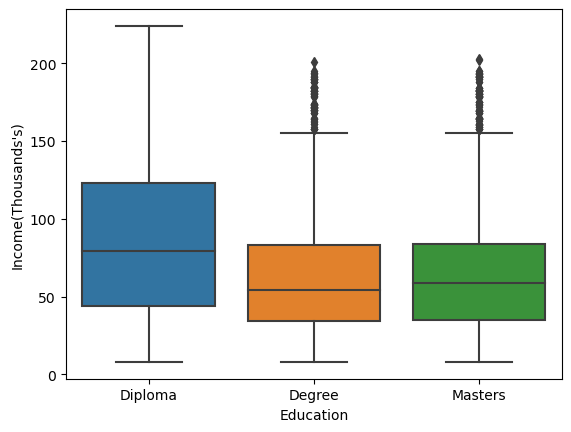

In [67]:
sns.boxplot(data=df, x='Education', y="Income(Thousands's)")

The following graph shows pair plots between selected columns. We can observe that there is a strong correlation between Age and Experience, which is a logical conclusion, since usually the older you are the more experience you have. Additionally, We can see that there is a correlation between credit score and Income. 


c:\Users\rober\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


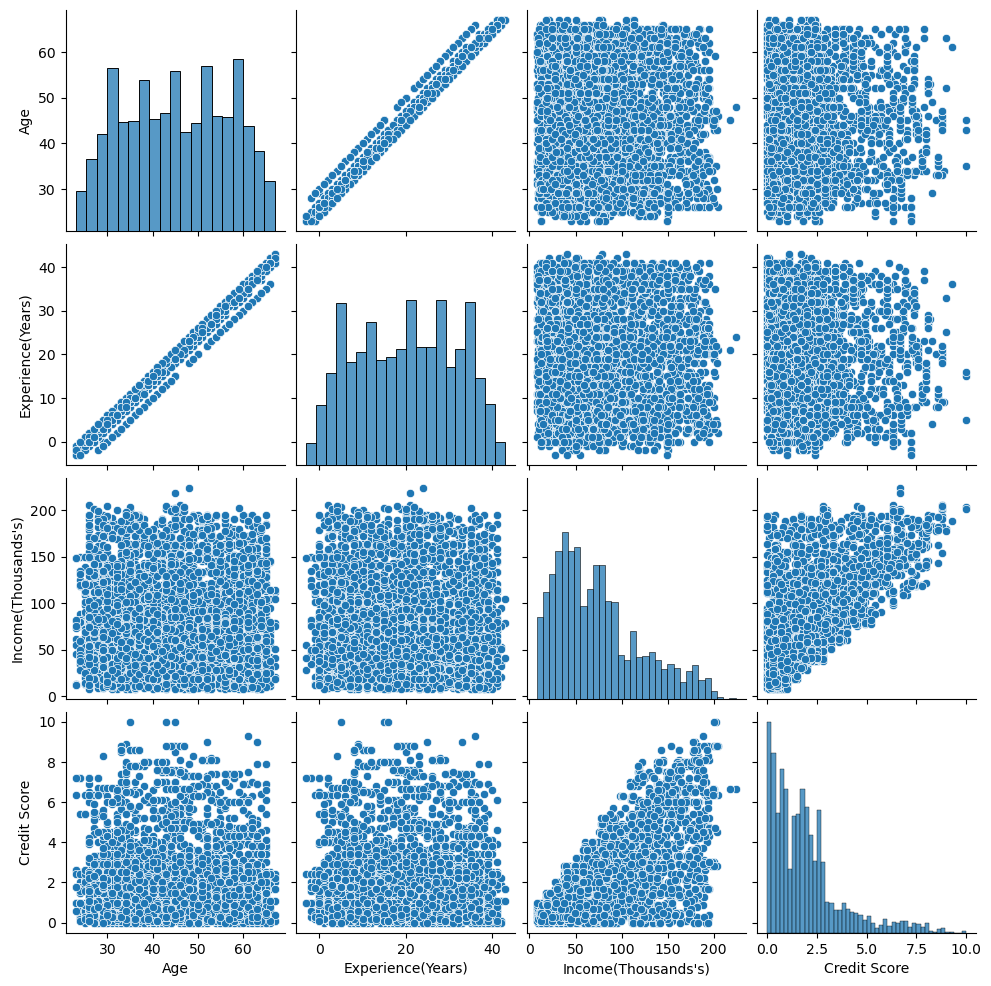

In [68]:
sns.pairplot(df[["Age", "Experience(Years)","Income(Thousands's)", "Credit Score"]])


The next graph shows Experience distribution across the dataset.

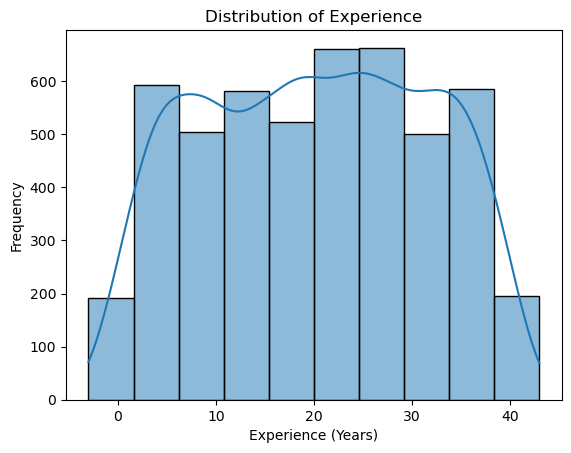

In [69]:
# Create a histogram for experience
sns.histplot(data=df, x='Experience(Years)', bins=10, kde=True)

# Add labels and title
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Experience')

# Show the plot
plt.show()


Next graph shows distribution of Family size in the dataset.

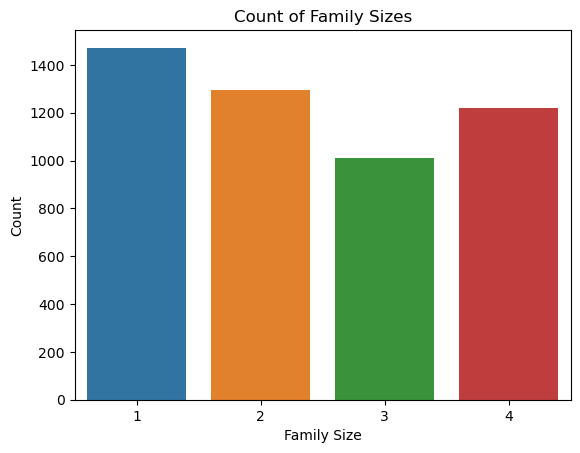

In [70]:
sns.countplot(data=df, x="Family")
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count of Family Sizes')
plt.show()


From the Experience distribution graph we can observe that values start below 0. 

The graph in the next cell shows line chart of average Experience by Age

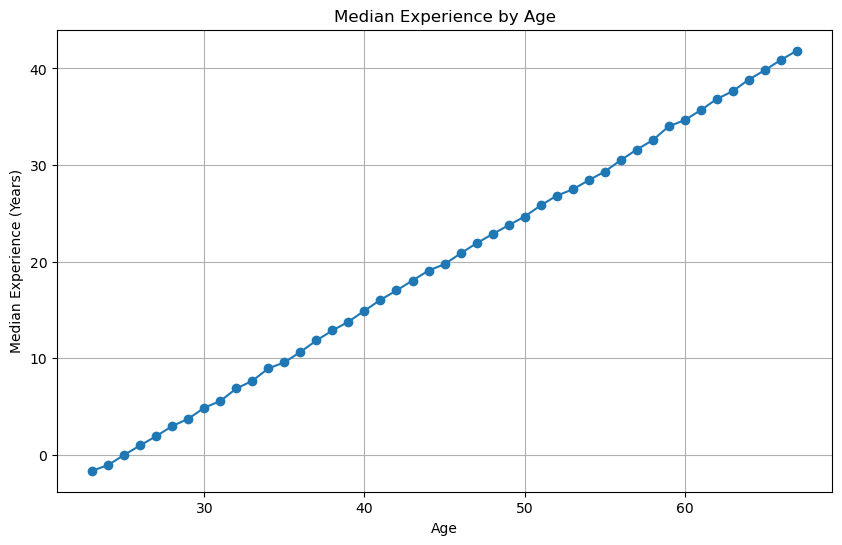

In [71]:
mean_exp_by_age = df.groupby("Age")["Experience(Years)"].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_exp_by_age.index, mean_exp_by_age.values, marker='o', linestyle='-')
plt.title('Median Experience by Age')
plt.xlabel('Age')
plt.ylabel('Median Experience (Years)')
plt.grid(True)
plt.show()

We could assume that this is bad data and remove it, however, there might be a pattern in it. For example, there are no negative values for the Experience column in Age groups above 30, which indicates to me that this is not just an error, this could potentially be a scaling issue, or some particular way that this data was encoded. Perhaps, there is a purpose behind representing it as a negative value. I decide to keep all the records and scale them to that they are represented as positive numbers. 

The code in the following cell filter dataframe for values in Experience columns where value is negative, then it groups and prints filtered dataframe by Age value.


In [72]:
filtered_df = df[(df["Experience(Years)"] <= 0) & (df["Income(Thousands's)"] > 0)]
age_group_counts = filtered_df.groupby("Age").size()

print("Number of records for each age group where experience is smaller than 0:")
print(age_group_counts)

Number of records for each age group where experience is smaller than 0:
Age
23    12
24    28
25    35
26    29
27     8
28     1
29     4
30     1
dtype: int64


The following cell displays total number of records grouped by Age, where Age is below 30. This is due to the fact that there are no negative values for Experience column above 30 years old.  

In [73]:
age_group_counts = df[df["Age"] <= 30].groupby("Age").size()

print("Number of records for each age group:")
print(age_group_counts)

Number of records for each age group:
Age
23     12
24     28
25     53
26     78
27     91
28    103
29    123
30    136
dtype: int64


### Conclusions to EDA

In conclusion, we can observe that there are several columns that are left-skewed and several that are categorical. In the next part, we will first encode categorical columns and then scale the rest of the columns. This will ensure that all values are positive and that distribution is closer to Gaussian.

### Data Manipulation

Encoding Education column

In [74]:
education_encoder = {
  "Diploma" : 1,
  "Degree" : 2,
  "Masters" : 3
}

df["Education"] = df["Education"].map(education_encoder)

Encoding Yes/No columns. 

We can simply change Yes for 1 and No for 0 in all of the Yes/No columns in the dataset.

In [75]:
binary_columns = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]

df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

We all columns encoded and represented by numbers, we can look at correlation matrix. 

This will tell us which features are the most associated with out target variable.

<Axes: >

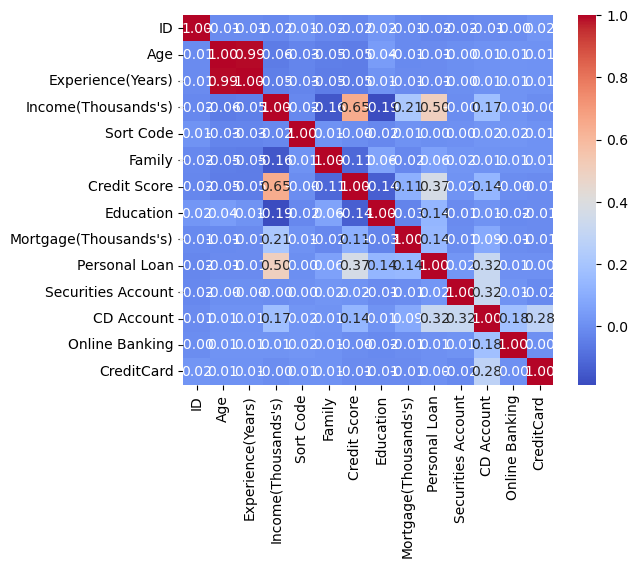

In [76]:
correlation_matrix = df.corr()
  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)


Drop ID column 

In [77]:
df = df.drop(columns="ID")

Selecting columns to be scaled

All numerical columns, except those that were encoded will be scaled. 

In [78]:
numerical_columns = ["Age","Experience(Years)","Income(Thousands's)","Credit Score","Mortgage(Thousands's)","Sort Code"]

Scaling columns

In [79]:
scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [80]:
df.head()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,0.045455,0.086957,0.189815,0.936527,4,0.16,1,0.0,0,1,0,0,0
1,0.500000,0.478261,0.120370,0.924872,3,0.15,1,0.0,0,1,0,0,0
2,0.363636,0.391304,0.013889,0.977892,1,0.10,1,0.0,0,0,0,0,0
3,0.272727,0.260870,0.425926,0.970931,1,0.27,2,0.0,0,0,0,0,0
4,0.272727,0.239130,0.171296,0.939080,4,0.10,2,0.0,0,0,0,0,1


Assigning independent and target variables. For independent variables, I will use all but the target variable. 

Then, dataset gets split into training and testing sets.

In [81]:
independent_variables = df.drop(columns="Income(Thousands's)").columns
X = df[independent_variables]

y = df["Income(Thousands's)"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

For the regression algorithm, I decided 

In [83]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],       # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
# }

# # Initialize the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best model for prediction
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print("Best Random Forest Regressor - Mean Squared Error:", mse)


In [84]:
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best_params

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [85]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(**best_params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error =", mse)

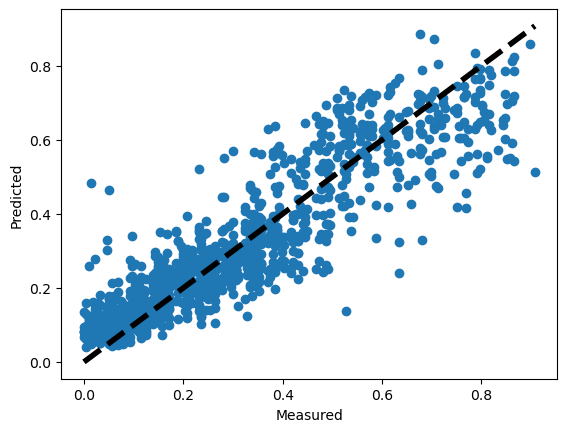

In [88]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',
lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show() 

Validating Testing Set

In [89]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Random Forest Regressor - Mean Squared Error:", mse)
print("Random Forest Regressor - Mean Absolute Error:", mae)


Random Forest Regressor - Mean Squared Error: 0.008643748835394203
Random Forest Regressor - Mean Absolute Error: 0.06887657261904762
Random Forest Regressor - Root Mean Squared Error: 0.09297176364571236


Validation Training Set

In [90]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Random Forest Regressor over training set - Mean Squared Error:", mse_train)
print("Random Forest Regressor over training set - Mean Absolute Error:", mae_train)

Random Forest Regressor over training set - Mean Squared Error: 0.0012679572538528308
Random Forest Regressor over training set - Mean Absolute Error: 0.025747557231040528
Random Forest Regressor over training set - Root Mean Squared Error: 0.03560838740876692


### Neural Network

In [92]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.optimizers 

model = keras.Sequential([
    layers.Dense(12, activation='relu'),
    # layers.Dense(4, activation='relu'), 
    # layers.Dense(2, activation='relu'),  
    layers.Dense(1, activation='sigmoid'),
])


model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae','accuracy']) 



history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.3)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)


Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0027 - loss: 0.0824 - mae: 0.2499 - val_accuracy: 0.0018 - val_loss: 0.0359 - val_mae: 0.1545
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0061 - loss: 0.0416 - mae: 0.1651 - val_accuracy: 0.0018 - val_loss: 0.0309 - val_mae: 0.1431
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0049 - loss: 0.0355 - mae: 0.1533 - val_accuracy: 0.0018 - val_loss: 0.0271 - val_mae: 0.1352
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0053 - loss: 0.0310 - mae: 0.1426 - val_accuracy: 0.0018 - val_loss: 0.0239 - val_mae: 0.1269
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0048 - loss: 0.0286 - mae: 0.1394 - val_accuracy: 0.0018 - val_loss: 0.0220 - val_mae: 0.1217
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0040 - loss: 0.0246 - mae: 0.1272 - val_accuracy: 0.0018 - val_loss: 0.0204 - val_mae: 0.1166
Epoch 7/100
132/132 ━━━━━━━━━━━━━━

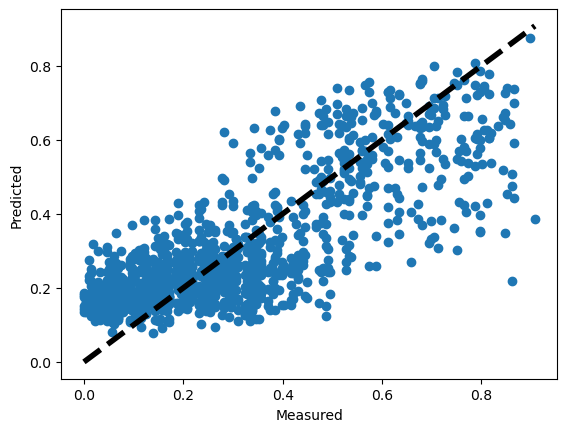

In [93]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',
lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show() 

In [94]:
# Define the number of samples
num_samples = 10


# Generate random values for each column
np.random.seed(42)  # For reproducibility

data = {
    "Age": np.random.randint(20, 70, size=num_samples),
    "Experience(Years)": [],
    "Family": np.random.randint(1, 5, size=num_samples),
    "Credit Score": np.round(np.random.uniform(0.5, 3.0, size=num_samples), 1),
    "Education": np.random.choice([1,2,3], size=num_samples),
    "Mortgage(Thousands's)": np.random.randint(0, 500, size=num_samples),
    "Personal Loan": np.random.choice([1,0], size=num_samples),
    "CD Account": np.random.choice([1,0], size=num_samples),
    "Estimated Income": [np.nan] * num_samples
}

experience = []

for age in data["Age"]:
    max = age - 18
    ex_r = np.random.randint(0,max)
    if max > 0:
        experience.append(ex_r)
    else:
        experience.append(0)

data["Experience(Years)"] = experience


# Create a DataFrame
users = pd.DataFrame(data)
users.head(10)

,Age,Experience(Years),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,CD Account,Estimated Income
0,58,39,3,2.3,3,306,0,1,NaN
1,48,3,4,2.8,2,134,0,0,NaN
2,34,1,1,0.5,2,20,1,1,NaN
3,62,5,4,3.0,3,328,0,0,NaN
4,27,5,4,2.0,2,166,1,1,NaN
5,40,9,4,2.0,3,273,0,1,NaN
6,58,3,3,0.5,3,387,0,0,NaN
7,38,17,2,0.6,1,88,0,1,NaN
8,42,11,1,1.8,3,315,1,0,NaN
9,30,1,2,1.5,1,13,0,0,NaN


In [95]:
numerical_columns = ['Age', 'Experience(Years)', 'Family', 'Credit Score', "Mortgage(Thousands's)"]

In [96]:

scaler = MinMaxScaler()
users[numerical_columns] = scaler.fit_transform(users[numerical_columns])


# Prepare data for prediction
features = users.drop(columns="Estimated Income")

# Make predictions
predictions = model.predict(features)

# Set the 'Estimated Income' column with the predicted values
users["Estimated Income"] = predictions

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- CreditCard
- Online Banking
- Securities Account
- Sort Code


In [ ]:
numerical_columns = ['Age', 'Experience(Years)', 'Family', 'Credit Score', "Mortgage(Thousands's)"]

In [ ]:
users.head(10)

In [ ]:
users[numerical_columns] = scaler.inverse_transform(users[numerical_columns])


In [ ]:
users.head()